# This notebook is to find a formaular to calculate a rating for batsman. 

The Formular will first look something as below
    Z = X1.C1 + X2.C2 + ... Xn.Cn
    Where X are the player attributes ( Strikerate, Runs Scored, etc) and Cs are coefficients which represents the weights of the attributes. 
    These weights will be calculated by finding out how important a attribute is in defining an outcome for a match. 

# 1. Calculating the Cs of the formular

In [138]:
#Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


#For Machine Learning Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [195]:
pd.set_option('display.max_rows',5000)

In [196]:
df = pd.read_csv('/Users/thejakamahaulpatha/PycharmProjects/Cricket Project/Dataset/playermatchstatsl.csv')

In [197]:
df.shape

(2453, 16)

In [198]:
df.columns

Index(['Unnamed: 0', 'Date', 'Player', 'Opposition', 'Ground', 'Inning',
       'Batted', 'Runs', 'Balls Faced', 'Strick Rate', 'Not Out', 'TeamScore',
       'TeamWicketslFallen', 'RPO', 'Overs', 'Result'],
      dtype='object')

In [199]:
df.head()

,Unnamed: 0,Date,Player,Opposition,Ground,Inning,Batted,Runs,Balls Faced,Strick Rate,Not Out,TeamScore,TeamWicketslFallen,RPO,Overs,Result
0,0,2017-10-20,A Dananjaya,Pakistan,Sharjah,1,True,18,37,48.64,False,173,10,3.96,43.4,lost
1,1,2017-10-20,S Samarawickrama,Pakistan,Sharjah,1,True,0,2,0.00,False,173,10,3.96,43.4,lost
2,2,2017-10-20,HDRL Thirimanne,Pakistan,Sharjah,1,True,62,94,65.95,False,173,10,3.96,43.4,lost
3,3,2017-10-20,WU Tharanga,Pakistan,Sharjah,1,True,0,5,0.00,False,173,10,3.96,43.4,lost
4,4,2017-10-20,NLTC Perera,Pakistan,Sharjah,1,True,0,1,0.00,False,173,10,3.96,43.4,lost


In [200]:
df.tail()

,Unnamed: 0,Date,Player,Opposition,Ground,Inning,Batted,Runs,Balls Faced,Strick Rate,Not Out,TeamScore,TeamWicketslFallen,RPO,Overs,Result
2448,2448,2011-11-20,KC Sangakkara,Pakistan,Sharjah,2,True,58,103,56.31,False,174,10,3.83,45.2,lost
2449,2449,2011-11-20,BMAJ Mendis,Pakistan,Sharjah,2,True,2,7,28.57,False,174,10,3.83,45.2,lost
2450,2450,2011-11-20,TM Dilshan,Pakistan,Sharjah,2,True,11,21,52.38,False,174,10,3.83,45.2,lost
2451,2451,2011-11-20,SL Malinga,Pakistan,Sharjah,2,True,4,6,66.66,False,174,10,3.83,45.2,lost
2452,2452,2011-11-20,LD Chandimal,Pakistan,Sharjah,2,True,11,19,57.89,False,174,10,3.83,45.2,lost


In [201]:
df.describe()

,Unnamed: 0,Inning,Runs,Balls Faced,Strick Rate,TeamScore,TeamWicketslFallen,RPO,Overs
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,1226.000000,1.439462,19.852018,23.964533,61.621553,232.461883,7.663677,5.280269,43.737220
std,708.264428,0.496423,26.904726,29.451303,53.013985,66.903597,2.772765,0.974089,9.232592
min,0.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,2.130000,3.200000
25%,613.000000,1.000000,0.000000,3.000000,0.000000,193.000000,6.000000,4.590000,41.100000
50%,1226.000000,1.000000,8.000000,13.000000,62.500000,236.000000,9.000000,5.210000,48.300000
75%,1839.000000,2.000000,29.000000,34.000000,92.300000,286.000000,10.000000,6.000000,50.000000
max,2452.000000,2.000000,174.000000,165.000000,400.000000,377.000000,10.000000,7.840000,50.000000


In [202]:
df['Result'].unique()

array(['lost', 'won', 'tied', 'n/r'], dtype=object)

In [203]:
# Let's remove the 'n/r' rows as this is not an outcome.

In [204]:
#Create a null array to include the indexes where 'n/r' exists
index = []
for i in range(len(df.index)):
    if df['Result'].values[i] == "n/r":
        index.append(i)

# Drop the rows where the 'n/r' is located
for j in index:
    df = df.drop(j)


In [205]:
#Let's check whether we have successfully dropped the 'n/r' values

In [206]:
df['Result'].unique()

array(['lost', 'won', 'tied'], dtype=object)

In [207]:
df.shape

(2387, 16)

In [208]:
# Now let's Remove the rows which the player had not batted as this will not make an impact for the Result. 

In [209]:
#Create a null array to include the indexes where 'False' exists in 'Batted' Column
# index2 = []
# for i in range(len(df.index)):
#     if df['Batted'].values[i] == False:
#         index2.append(i)

# # Drop the rows where the 'False' is located
# for j in index2:
#     df = df.drop(j)

df.drop(df[df['Batted'] == False].index, inplace = True)


In [210]:
#Let's check whether we have successfully dropped the 'False' values in 'Batted' column

In [211]:
df['Batted'].unique()

array([ True])

In [212]:
df.shape

(2003, 16)

In [213]:
#Let's see which attributes makes sense to be taken for the calculation. 
#We can see the Runs , Strike Rate are key attributes relate to measuring batsman statistic

In [214]:
#Before fitting a model we need to change the nominal values of the Results to a integer values

In [215]:
# Let's replace these values with int
df['Result'].replace({"lost": int(0),"won":int(1),"tied":int(2)}, inplace=True)

In [216]:
# We will see the data types of the columns we have chose incase before fitting the model ('Runs','Strike Rate','Result')

In [217]:
df.dtypes

Unnamed: 0              int64
Date                   object
Player                 object
Opposition             object
Ground                 object
Inning                  int64
Batted                   bool
Runs                    int64
Balls Faced             int64
Strick Rate           float64
Not Out                  bool
TeamScore               int64
TeamWicketslFallen      int64
RPO                   float64
Overs                 float64
Result                  int64
dtype: object

In [218]:
# We will see the selected distributions through a histrogram

<AxesSubplot:>

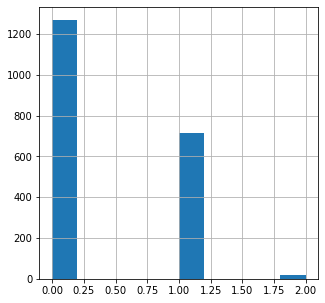

In [219]:
df['Result'].hist(figsize = (5, 5))

<AxesSubplot:>

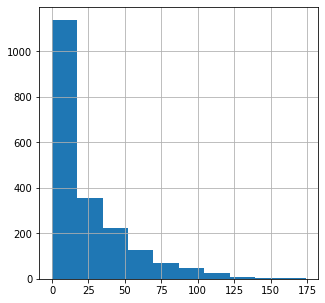

In [220]:
df['Runs'].hist(figsize = (5, 5))

In [221]:
# Now let's define our training and testing data sets from the data frame we have

In [222]:
x = df.iloc[:,[7,8]].values
y = df.iloc[:,15].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1) 

In [223]:
#We will see which algorithm gives the best results for predicting the outcome. 
#Creating a list with the models

models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM',SVC(gamma='auto')))

In [224]:
results = []
names = []

for name,model in models:
    kfold = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_results.mean(),cv_results.std()))


LR: 0.655792 (0.000666)
LDA: 0.658455 (0.003329)
KNN: 0.611851 (0.011318)
CART: 0.573236 (0.004660)
NB: 0.637150 (0.004660)
RFC: 0.584554 (0.000000)
SVM: 0.631158 (0.010652)


In [225]:
# We can see the Linear Discriminant Analysis gives a better result.

In [226]:
# Let's test the feature significance for this algorithm.

In [227]:
#Permutation Importance
#eli5 provides a way to compute feature importances for any black-box estimator by 
#measuring how score decreases when a feature is not available; the method is also 
#known as “permutation importance” or “Mean Decrease Accuracy (MDA)”.

Feature: 0, Score: 0.08184
Feature: 1, Score: 0.01477


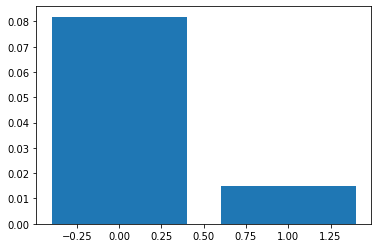

In [228]:
model = LinearDiscriminantAnalysis()
# fit the model
model.fit(x_train, y_train)

# get importance
imps = permutation_importance(model, x_test, y_test)

importance = imps.importances_mean

# summarize feature importance
for i,v in enumerate(imps.importances_mean):
#     print(importance[i])
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### C1 = 0.07784
#### C2 = 0.01637
#### So the forumula will look as   Z = (Average Runs)(0.07784) + (Average Strike Rate)(0.01637)

# Now let's find the rakings of players accordance with their batting score Z

In [229]:
#Calculating for a single player

playerName = 'KC Sangakkara'
totalRuns=0
strikeRate=0
count=0
batsmanRating = 0

for i in range(len(df.index)):
    if df['Player'].values[i] == playerName:
        totalRuns=totalRuns + df['Runs'].values[i]
        strikeRate = strikeRate + df['Strick Rate'].values[i]
        count = count+1
        
averageRuns = totalRuns/count    
averageStrikeRate = strikeRate/count    

print(averageRuns,averageStrikeRate)

batsmanRating = (averageRuns*0.07784)+(averageStrikeRate*0.01637)
print(batsmanRating)

47.0377358490566 75.76264150943396
4.9016518


In [230]:
#Let's Find the same for all the players and put them in an array

In [231]:
playerNameArr = df['Player'].unique()

batsmanStat = pd.DataFrame({
    'Player Name':
    [],
    'Total Played Innings':
    [],
    'averageRuns':
    [],
    'averageStrikeRate':
    [],
    'batsmanRating':
    []
})


for player in playerNameArr:
    
    playerName = player
    totalRuns=0
    strikeRate=0
    count=0
    batsmanRating = 0
    
    for i in range(len(df.index)):
        if df['Player'].values[i] == playerName:
            totalRuns=totalRuns + df['Runs'].values[i]
            strikeRate = strikeRate + df['Strick Rate'].values[i]
            count = count+1
    
    averageRuns = totalRuns/count    
    averageStrikeRate = strikeRate/count   
    batsmanRating = (averageRuns*0.07784)+(averageStrikeRate*0.01637)
    
#     batsmanStat['Player Name'].values[] 
    batsmanStat.loc[len(batsmanStat.index)] = [playerName,count,averageRuns,averageStrikeRate,batsmanRating] 

    

In [232]:
print(batsmanStat)

         Player Name  Total Played Innings  averageRuns  averageStrikeRate  \
0        A Dananjaya                  27.0    10.481481          69.348148   
1   S Samarawickrama                   7.0    19.714286          49.464286   
2    HDRL Thirimanne                 102.0    30.764706          64.185196   
3        WU Tharanga                 104.0    27.769231          72.382115   
4        NLTC Perera                 117.0    18.247863          94.577094   
5         PLS Gamage                   5.0     0.800000          12.500000   
6       LD Chandimal                 127.0    27.244094          66.346929   
7         RAS Lakmal                  45.0     5.355556          52.859111   
8        N Dickwella                  49.0    32.061224          91.354082   
9    TAM Siriwardana                  23.0    21.130435          93.178261   
10        S Prasanna                  36.0    11.638889          68.751389   
11    MD Gunathilaka                  38.0    37.526316         

In [233]:
batsmanStat.sort_values(by=['batsmanRating'],ascending=False)

,Player Name,Total Played Innings,averageRuns,averageStrikeRate,batsmanRating
26,KC Sangakkara,106.0,47.037736,75.762642,4.901652
62,KNA Bandara,3.0,41.000000,73.976667,4.402438
23,TM Dilshan,121.0,39.123967,79.897190,4.353327
70,M Bhanuka,1.0,36.000000,92.300000,4.313191
11,MD Gunathilaka,38.0,37.526316,80.296053,4.235495
54,WIA Fernando,18.0,36.277778,79.957778,4.132771
8,N Dickwella,49.0,32.061224,91.354082,3.991112
33,MD Shanaka,19.0,25.684211,115.635263,3.892208
20,DPMD Jayawardene,96.0,33.312500,73.600313,3.797882
22,AD Mathews,153.0,32.084967,76.648039,3.752222


In [ ]:
#We need to find a way to take the total number of played innings into the consideration as you can see
#ones who has played less innings are better in maintaining the average as the risk is very low of getting out. 

#This topic will be for a nother day